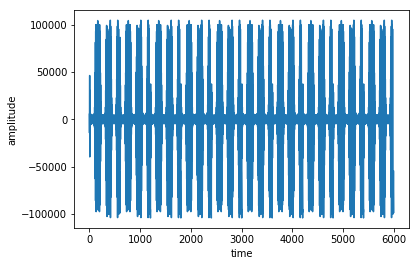

In [12]:
from pynq import Overlay
from pynq import MMIO
import matplotlib.pyplot as plt
import numpy as np


def twos_comp(val, bits):
   if (val & (1 << (bits - 1))) != 0:
       val = val - (1 << bits)        
   return val    

ol = Overlay("./fir11.bit") # designate a bitstream to be flashed to the FPGA
ol.download() # flash the FPGA

fir = MMIO(0x40000000, 0x10000) # (IP_BASE_ADDRESS, ADDRESS_RANGE), told to us in Vivado

input_d = []
output_d = []

with open("input.dat") as firdata:
   for line in firdata:
       fir.write(0x20,int(line));
       fir.write(0x00,1);
       input_d.append(twos_comp(fir.read(0x18), 32))
       output_d.append(twos_comp(fir.read(0x10),32))  
     
        
# Data for plotting
plt.plot(output_d)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()